In [14]:
# take square root or log 

#How to fix distriubtution to become normal 

In [15]:
# Explanatory power: assumptions of linear regression
# 2.4.3

In [30]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [31]:
# Acquire, load, and preview the data.
data = pd.read_csv('2.4.3.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


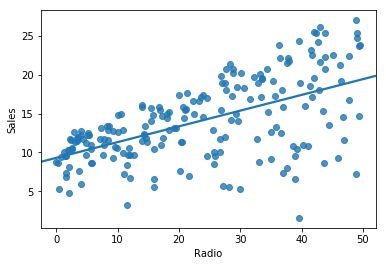

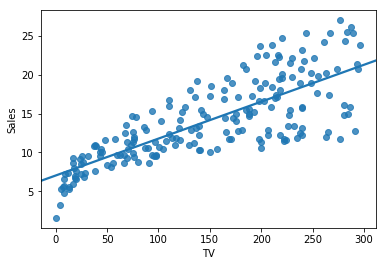

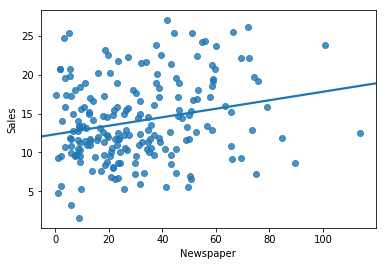

In [39]:
sns.regplot(data['Radio'], data['Sales'], ci = False)
plt.show()


sns.regplot(data['TV'], data['Sales'], ci = False)
plt.show()


sns.regplot(data['Newspaper'], data['Sales'], ci = False)
plt.show()

In [34]:
#Issue with Sales and Newspaper. Must create linear relationship. Using SqRt

In [35]:
data['Sales_sqrt'] = data['Sales']**0.5

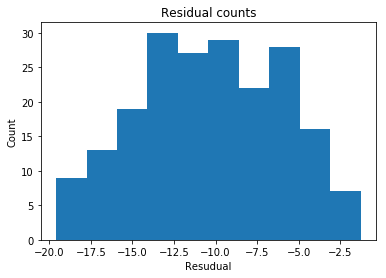

In [36]:
predicted = regr.predict(X).ravel()
actual = data['Sales_sqrt']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Resudual')
plt.ylabel('Count')
plt.show()

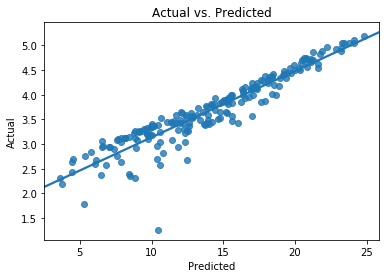

In [37]:
sns.regplot(predicted, actual, ci = False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.axhline(y=0)
plt.title('Actual vs. Predicted')
plt.show()

In [38]:
Y = data['Sales_sqrt'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[6.35315463e-03 2.35844016e-02 9.53200418e-05]]

Intercept: 
 [2.19135068]

R-squared:
0.8766526458668336
